## Estadística Aplicada

Actividad 5 Modelos de supervivencia

Paulina Quiroz Sánchez 1723927

Grupo 041



#Ejercicio 3
En el enlace se encuentra la base de datos “quiebra.csv” que mide los años que tarda  en  quebrar  una  empresa  (desde  que se  crea  hasta  que quiebra),  la variable quebrar toma valores de 1 si la empresa quebró y 0 si esta censurada(no se observó la quiebra en el periodo de observación). La variable mujer toma valores  de  0  si  el  fundador  de  la  empresa  es  hombre  y  1  si  el  fundador  de  la empresa  es  mujer.  La  variable  tiempo  mide  los  años  que  tardo  en  quebrar  la empresa. Responda en una notebook de Python cada inciso.raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/quiebra.csv

a)Ajuste un modelo de supervivencia exponencial

b)Grafique la función de riesgo exponencial

c)¿Cuáles  el  riesgo  de  que una empresa  quiebre  según  la  función exponencial?


In [ ]:
##librerias básicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#librerias especializadas
!pip install lifelines

In [ ]:
# librerias especializadas
from lifelines import  ExponentialFitter

In [ ]:
quiebra = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/quiebra.csv')

In [ ]:
exp_fit = ExponentialFitter()
exp_fit.fit(quiebra['tiempo'], event_observed=quiebra['quebrar'])

<lifelines.ExponentialFitter:"Exponential_estimate", fitted with 100 total observations, 52 right-censored observations>

In [ ]:
exp_fit.hazard_

,Exponential_estimate
1.000000,0.032498
1.292929,0.032498
1.585859,0.032498
1.878788,0.032498
2.171717,0.032498
...,...
28.828283,0.032498
29.121212,0.032498
29.414141,0.032498
29.707071,0.032498


Text(0.5, 1.0, 'Función de Riesgo Exponencial $\\lambda=0.032498$')

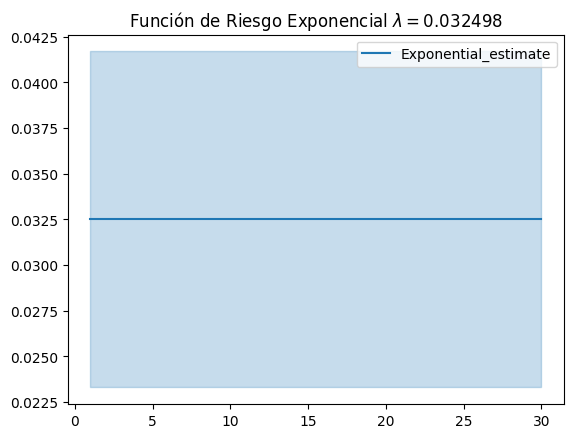

In [ ]:
exp_fit.plot_hazard()
plt.title('Función de Riesgo Exponencial $\lambda=0.032498$')

In [ ]:
lambda_estimado = 1 / exp_fit.params_['lambda_']
import numpy as np
# Calcular el riesgo en un rango de tiempos
tiempos_a_calcular = [1, 2, 3, 4, 5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]

riesgo_en_tiempos = [lambda_estimado * np.exp(-lambda_estimado * t) for t in tiempos_a_calcular]

# Imprimir los resultados
for tiempo, riesgo in zip(tiempos_a_calcular, riesgo_en_tiempos):
    print(f"Riesgo de quiebra en {tiempo} años: {riesgo:.2f}")

Riesgo de quiebra en 1 años: 0.03
Riesgo de quiebra en 2 años: 0.03
Riesgo de quiebra en 3 años: 0.03
Riesgo de quiebra en 4 años: 0.03
Riesgo de quiebra en 5 años: 0.03
Riesgo de quiebra en 6 años: 0.03
Riesgo de quiebra en 7 años: 0.03
Riesgo de quiebra en 8 años: 0.03
Riesgo de quiebra en 9 años: 0.02
Riesgo de quiebra en 10 años: 0.02
Riesgo de quiebra en 11 años: 0.02
Riesgo de quiebra en 12 años: 0.02
Riesgo de quiebra en 13 años: 0.02
Riesgo de quiebra en 14 años: 0.02
Riesgo de quiebra en 15 años: 0.02
Riesgo de quiebra en 16 años: 0.02
Riesgo de quiebra en 17 años: 0.02
Riesgo de quiebra en 18 años: 0.02
Riesgo de quiebra en 19 años: 0.02
Riesgo de quiebra en 20 años: 0.02
Riesgo de quiebra en 21 años: 0.02
Riesgo de quiebra en 22 años: 0.02
Riesgo de quiebra en 23 años: 0.02
Riesgo de quiebra en 24 años: 0.01
Riesgo de quiebra en 25 años: 0.01
Riesgo de quiebra en 26 años: 0.01
Riesgo de quiebra en 27 años: 0.01
Riesgo de quiebra en 28 años: 0.01
Riesgo de quiebra en 29 años:

4.-Con  la  base  de  datos del  punto  3 responda en  la  misma  notebook  lo siguiente:

a)Ajuste un modelo Weibull de supervivencia

b)Grafique la función de riesgo

c)¿Qué forma tiene la función de riesgo? y ¿qué significa?

In [ ]:
from lifelines import WeibullFitter


In [ ]:
weibull_model = WeibullFitter()
weibull_model.fit(quiebra["tiempo"], quiebra["quebrar"])

<lifelines.WeibullFitter:"Weibull_estimate", fitted with 100 total observations, 52 right-censored observations>

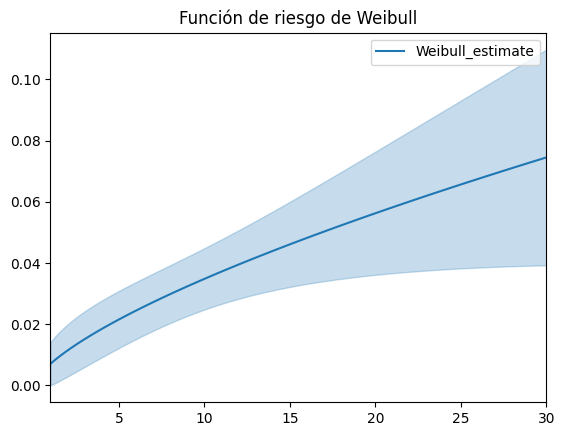

In [ ]:
weibull_model.plot_hazard()
plt.title('Función de riesgo de Weibull')
plt.xlim(quiebra['tiempo'].min(), quiebra['tiempo'].max());

In [ ]:
print("Parámetros del modelo de supervivencia Weibull:")
print("Lambda:", weibull_model.lambda_)
print("Rho:", weibull_model.rho_)

Parámetros del modelo de supervivencia Weibull:
Lambda: 25.46114716125602
Rho: 1.6927874452647882


La función de riesgo muestra una tendencia creciente, esto significa que el riesgo de que una empresa quiebre aumenta a medida que pasa el tiempo, pero luego disminuye a medida que se acerca al final del período de observación.

5.- Con  la  base  de  datos  del  punto  3  responda  en  la  misma  notebook  lo siguiente:

a)Ajuste un modelo Log-Normal

b)Grafique la función de riesgo

c)En qué periodo el riesgo de quebrar es creciente y en cuál decreciente

In [ ]:
from lifelines import LogNormalFitter

In [ ]:
lognormal_model = LogNormalFitter()
lognormal_model.fit(quiebra["tiempo"], quiebra["quebrar"])

<lifelines.LogNormalFitter:"LogNormal_estimate", fitted with 100 total observations, 52 right-censored observations>

(1.0, 30.0)

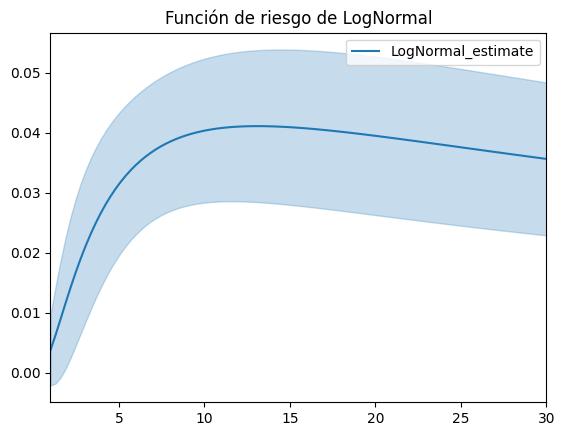

In [ ]:
lognormal_model.plot_hazard()
plt.title('Función de riesgo de LogNormal')
plt.xlim(quiebra['tiempo'].min(), quiebra['tiempo'].max())

In [ ]:
print("Parámetros del modelo de supervivencia Log-Normal:")
print("Mu:", lognormal_model.mu_)
print("Sigma:", lognormal_model.sigma_)

Parámetros del modelo de supervivencia Log-Normal:
Mu: 3.0238300714653605
Sigma: 0.9883591649886788


De 0 a 9 años el riesgo de quebrar es creciente, pero en los años 10 hasta los 30 podemos observar que el riesgo es decreciente, entonces podemos concluir que como va avanzando el tiempo la empresa tiene menos probabilidad de quebrar y el riesgo es muy bajo

6.-Utilizando  el estimador  de  Kaplan-Meier realice  una  notebook  en  Python para responder lo siguiente:

a)Estime   la   función   de   supervivencia   y   la   mediana   de   tiempo   de supervivencia y diga que significa.

b)Estime  la  función  de  supervivencia  por  Kaplan-meier  para  hombres  y mujeres  y  grafique  con .plot_survival_function(ci_show=False) y  diga  si  las empresas administradas por hombres/mujeres quiebran más rápido. No olvide etiquetar cada línea y agregar todos los elementos en cada gráfica.

c)El profesor cree que las empresas fundadas por hombres quiebran más rápido,   refute   o   confirme   con   evidencia   estadística   tal   afirmación (pruebas de hipótesis, graficas, tablas etc.)

In [ ]:
from lifelines import KaplanMeierFitter

In [ ]:
km1 = KaplanMeierFitter().fit(quiebra['tiempo'], quiebra['quebrar'])

In [ ]:
km1.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,100,100
1.0,2,1,1,0,100
2.0,6,3,3,0,98
3.0,5,3,2,0,92
4.0,2,0,2,0,87
5.0,2,1,1,0,85
7.0,4,4,0,0,83
8.0,9,4,5,0,79
9.0,3,0,3,0,70


<Axes: xlabel='timeline'>

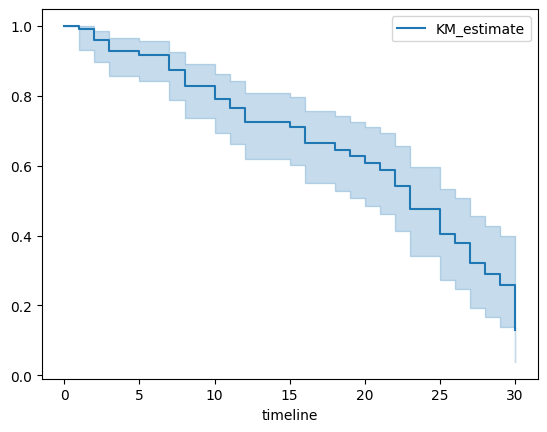

In [ ]:
km1.plot_survival_function()

In [ ]:
km1.median_survival_time_

23.0

La mediana de tiempo de supervivencia Kaplan-Meier es 23.0. Esto significa que el 50% de las empresas estudiadas tardaron menos de 23.0 años en quebrar, mientras que el otro 50% tardó más de 23.0 años en quebrar

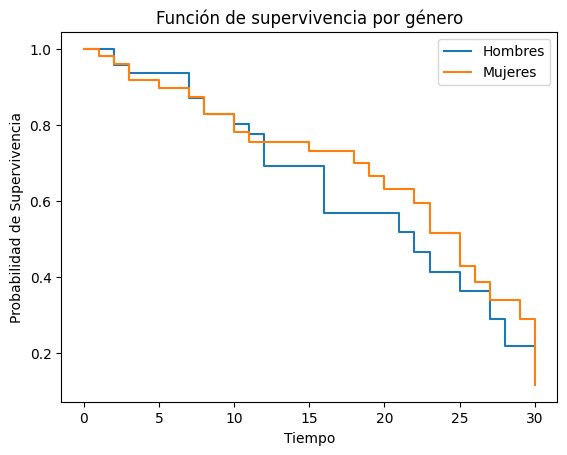

In [ ]:
kmf_hombres = KaplanMeierFitter()
kmf_mujeres = KaplanMeierFitter()

hombres = quiebra[quiebra['mujer'] == 0]
mujeres = quiebra[quiebra['mujer'] == 1]

kmf_hombres.fit(hombres['tiempo'], hombres['quebrar'])
kmf_mujeres.fit(mujeres['tiempo'], mujeres['quebrar'])

ax = kmf_hombres.plot_survival_function(ci_show=False)
kmf_mujeres.plot_survival_function(ax=ax, ci_show=False)

plt.title('Función de supervivencia por género')
plt.xlabel('Tiempo')
plt.ylabel('Probabilidad de Supervivencia')
plt.legend(loc='best', labels=['Hombres', 'Mujeres'])


plt.show()

Prueba de Hipotesis
Ho = no hay diferencia significativa en la tasa de quiebra entre empresas fundadas por hombres y empresas fundadas por mujeres.

Ha = hay una diferencia significativa en la tasa de quiebra entre los dos grupos.

In [ ]:
from lifelines.statistics import logrank_test

results = logrank_test(hombres['tiempo'], mujeres['tiempo'], hombres['quebrar'], mujeres['quebrar'])
results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.28 0.59      0.75

Con un α = 0.05

 No rechazamos Ho, no hay suficiente evidencia para respaldar la afirmación del profesor de que las empresas fundadas por hombres quiebran más rápido que las empresas fundadas por mujeres.